# Business Case: Delhivery - Feature Engineering

- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

- The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

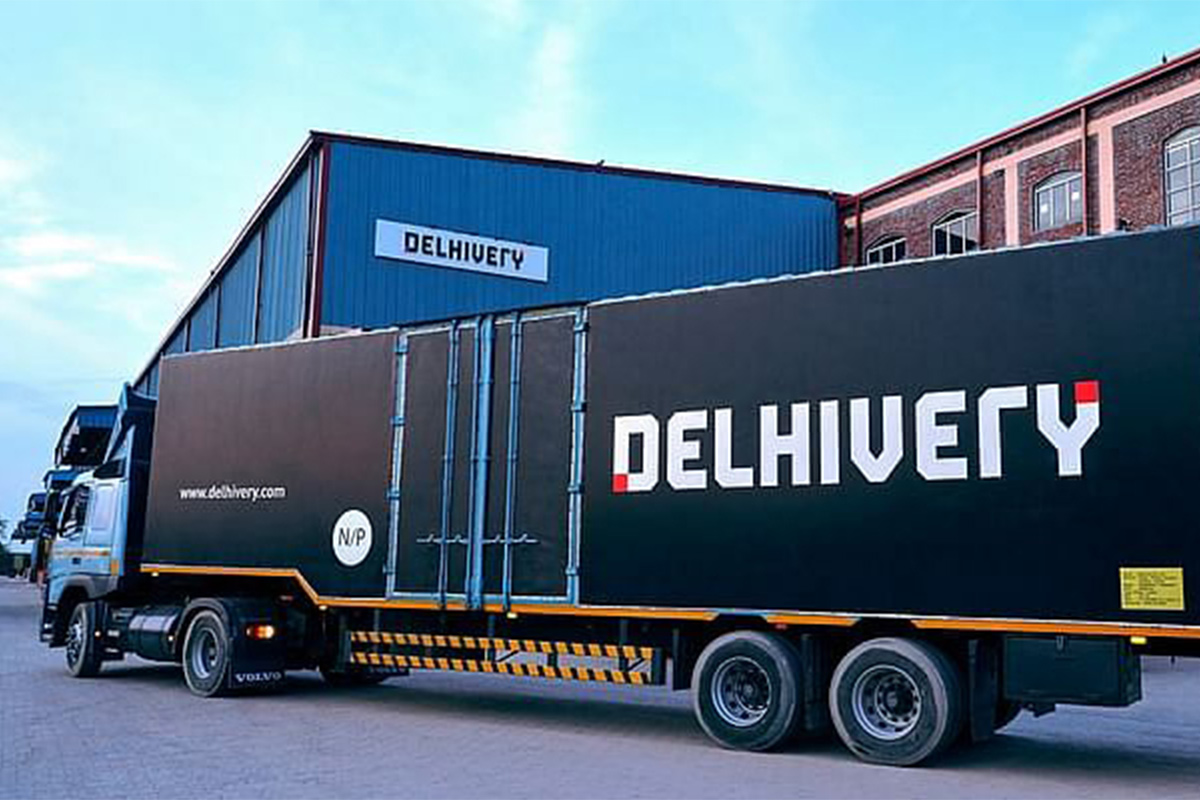

### Business Problem:

- The company aims to optimize its data engineering pipelines by enhancing its capacity to clean, sanitize, and manipulate incoming data to derive valuable features from raw fields.
- This initiative seeks to streamline the process of making sense of raw data, empowering the data science team to construct more accurate forecasting models.

## Dataset Information:

#### Source:
Please check the dataset at: "[Dataset Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181)"

#### Feature Information:
- **data:** tells whether the data is testing or training data
- **trip_creation_time:** Timestamp of trip creation
- **route_schedule_uuid:** Unique Id for a particular route schedule
- **route_type:** Transportation type
    - **FTL(Full Truck Load):** FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    - **Carting:** Handling system consisting of small vehicles (carts)
- **trip_uuid:** Unique ID given to a particular trip (A trip may include different source and destination centers)
- **source_center:** Source ID of trip origin
- **source_name:** Source Name of trip origin
- **destination_cente:** Destination ID
- **destination_name:** Destination Name
- **od_start_time:** Trip start time
- **od_end_time:** Trip end time
- **start_scan_to_end_scan:** Time taken to deliver from source to destination
- **is_cutoff:** Unknown field
- **cutoff_factor:** Unknown field
- **cutoff_timestamp:** Unknown field
- **actual_distance_to_destination:** Distance in Kms between source and destination warehouse
- **actual_time:** Actual time taken to complete the delivery (Cumulative)
- **osrm_time:** An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- **osrm_distance:** An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- **factor:** Unknown field
- **segment_actual_time:** This is a segment time. Time taken by the subset of the package delivery
- **segment_osrm_time:** This is the OSRM segment time. Time taken by the subset of the package delivery
- **segment_osrm_distance:** This is the OSRM distance. Distance covered by subset of the package delivery
- **segment_factor:** Unknown field

## Loading the "delhivery_data.txt" Dataset:

For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,Scipy and then import the "delhivery_data.txt" dataset and save it in a dataframe "data".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def custom_date_parser(col):
    return pd.to_datetime(col.split('.')[0])
    
data = pd.read_csv("delhivery_data.txt", 
                   parse_dates = ['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp'],
                   date_parser = custom_date_parser)

In [3]:
data.head()

data  trip_creation_time  \
0  training 2018-09-20 02:35:36   
1  training 2018-09-20 02:35:36   
2  training 2018-09-20 02:35:36   
3  training 2018-09-20 02:35:36   
4  training 2018-09-20 02:35:36   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name       od_start_time  ...  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32  ...   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32  ...   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32  ...   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32  ...   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32  ...   

     cutoff_timestamp  actual_distance_to_destination  actual_time  osrm_time  \
0 2018-09-20 04:27:55                       10.435660         14.0       11.0   
1 2018-09-20 04:17:55                       18.936842         24.0       20.0   
2 2018-09-20 04:01:19                       27.637279         40.0       28.0   
3 2018-09-20 03:39:57                       36.118028         62.0       40.0   
4 2018-09-20 03:33:55                       39.386040         68.0       44.0   

  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.9653  1.272727                 14.0               11.0   
1       21.7243  1.200000                 10.0                9.0   
2       32.5395  1.428571                 16.0                7.0   
3       45.5620  1.550000                 21.0               12.0   
4       54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor  
0                11.9653        1.272727  
1                 9.7590        1.111111  
2                10.8152        2.285714  
3                13.0224        1.750000  
4                 3.9153        1.200000  

[5 rows x 24 columns]

In [4]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [5]:
data.shape

(144867, 24)

## Basic Exploration of Data:

In [6]:
# Dropping unknown columns 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp','factor', 'segment_factor'

df = data.drop(columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp','factor', 'segment_factor'], axis = 1)

In [7]:
# Checking the columns of the dataset

df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [8]:
df.head(3)

data  trip_creation_time  \
0  training 2018-09-20 02:35:36   
1  training 2018-09-20 02:35:36   
2  training 2018-09-20 02:35:36   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name       od_start_time  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   

          od_end_time  start_scan_to_end_scan  actual_distance_to_destination  \
0 2018-09-20 04:47:45                    86.0                       10.435660   
1 2018-09-20 04:47:45                    86.0                       18.936842   
2 2018-09-20 04:47:45                    86.0                       27.637279   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0         14.0       11.0        11.9653                 14.0   
1         24.0       20.0        21.7243                 10.0   
2         40.0       28.0        32.5395                 16.0   

   segment_osrm_time  segment_osrm_distance  
0               11.0                11.9653  
1                9.0                 9.7590  
2                7.0                10.8152

In [9]:
# Getting the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [10]:
# Checking for duplicate values

df.duplicated().sum()

0

In [11]:
# Checking for missing values

df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

## Data Cleaning & Feature Extraction:

In [12]:
df.loc[df.trip_uuid=='trip-153741093647649320']

data  trip_creation_time  \
0  training 2018-09-20 02:35:36   
1  training 2018-09-20 02:35:36   
2  training 2018-09-20 02:35:36   
3  training 2018-09-20 02:35:36   
4  training 2018-09-20 02:35:36   
5  training 2018-09-20 02:35:36   
6  training 2018-09-20 02:35:36   
7  training 2018-09-20 02:35:36   
8  training 2018-09-20 02:35:36   
9  training 2018-09-20 02:35:36   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                    source_name  \
0  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
5  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
6  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
7  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
8  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
9  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

  destination_center               destination_name       od_start_time  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
5       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
6       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
7       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
8       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
9       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   

          od_end_time  start_scan_to_end_scan  actual_distance_to_destination  \
0 2018-09-20 04:47:45                    86.0                       10.435660   
1 2018-09-20 04:47:45                    86.0                       18.936842   
2 2018-09-20 04:47:45                    86.0                       27.637279   
3 2018-09-20 04:47:45                    86.0                       36.118028   
4 2018-09-20 04:47:45                    86.0                       39.386040   
5 2018-09-20 06:36:55                   109.0                       10.403038   
6 2018-09-20 06:36:55                   109.0                       18.045481   
7 2018-09-20 06:36:55                   109.0                       28.061896   
8 2018-09-20 06:36:55                   109.0                       38.939167   
9 2018-09-20 06:36:55                   109.0                       43.595802   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0         14.0       11.0        11.9653                 14.0   
1         24.0       20.0        21.7243                 10.0   
2         40.0       28.0        32.5395                 16.0   
3         62.0       40.0        45.5620                 21.0   
4         68.0

### Creating new column 'segment_id' and aggregating some rows by 'segment_id':

- Since every trip_uuid contains multiple trips with different source and destination, first we will merge rows with unique trip_uuid-source-destination combination and create a new column 'segment_id'.
- We calculate columns 'segment_actual_time', 'segment_osrm_time' and 'segment_osrm_distance' for each 'segment_id'.

In [13]:
df['segment_id'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [14]:
df.loc[df.trip_uuid=='trip-153741093647649320']

data  trip_creation_time  \
0  training 2018-09-20 02:35:36   
1  training 2018-09-20 02:35:36   
2  training 2018-09-20 02:35:36   
3  training 2018-09-20 02:35:36   
4  training 2018-09-20 02:35:36   
5  training 2018-09-20 02:35:36   
6  training 2018-09-20 02:35:36   
7  training 2018-09-20 02:35:36   
8  training 2018-09-20 02:35:36   
9  training 2018-09-20 02:35:36   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                    source_name  \
0  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
5  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
6  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
7  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
8  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
9  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

  destination_center               destination_name       od_start_time  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
5       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
6       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
7       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
8       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   
9       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   

          od_end_time  start_scan_to_end_scan  actual_distance_to_destination  \
0 2018-09-20 04:47:45                    86.0                       10.435660   
1 2018-09-20 04:47:45                    86.0                       18.936842   
2 2018-09-20 04:47:45                    86.0                       27.637279   
3 2018-09-20 04:47:45                    86.0                       36.118028   
4 2018-09-20 04:47:45                    86.0                       39.386040   
5 2018-09-20 06:36:55                   109.0                       10.403038   
6 2018-09-20 06:36:55                   109.0                       18.045481   
7 2018-09-20 06:36:55                   109.0                       28.061896   
8 2018-09-20 06:36:55                   109.0                       38.939167   
9 2018-09-20 06:36:55                   109.0                       43.595802   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0         14.0       11.0        11.9653                 14.0   
1         24.0       20.0        21.7243                 24.0   
2         40.0       28.0        32.5395                 40.0   
3         62.0       40.0        45.5620                 61.0   
4         68.0

In [15]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_id'],
      dtype='object')

### Aggregataing on the basis of segment_id keeping the first and last values for some numeric/categorical fields: 

In [16]:
merge_segment = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last'
}

In [17]:
df = df.sort_values(['segment_id','actual_time'], ascending = [1,1])
segment_df = df.groupby('segment_id').agg(merge_segment).reset_index()
segment_df.head()

segment_id  trip_creation_time  \
0  trip-153671041653548748IND209304AAAIND000000ACB 2018-09-12 00:00:16   
1  trip-153671041653548748IND462022AAAIND209304AAA 2018-09-12 00:00:16   
2  trip-153671042288605164IND561203AABIND562101AAA 2018-09-12 00:00:22   
3  trip-153671042288605164IND572101AAAIND561203AAB 2018-09-12 00:00:22   
4  trip-153671043369099517IND000000ACBIND160002AAC 2018-09-12 00:00:33   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
1  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL   
2  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
3  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting   
4  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL   

                 trip_uuid source_center                         source_name  \
0  trip-153671041653548748  IND209304AAA  Kanpur_Central_H_6 (Uttar Pradesh)   
1  trip-153671041653548748  IND462022AAA  Bhopal_Trnsport_H (Madhya Pradesh)   
2  trip-153671042288605164  IND561203AAB   Doddablpur_ChikaDPP_D (Karnataka)   
3  trip-153671042288605164  IND572101AAA       Tumkur_Veersagr_I (Karnataka)   
4  trip-153671043369099517  IND000000ACB       Gurgaon_Bilaspur_HB (Haryana)   

  destination_center                    destination_name       od_start_time  \
0       IND000000ACB       Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 16:39:46   
1       IND209304AAA  Kanpur_Central_H_6 (Uttar Pradesh) 2018-09-12 00:00:16   
2       IND562101AAA   Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 02:03:09   
3       IND561203AAB   Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22   
4       IND160002AAC      Chandigarh_Mehmdpur_H (Punjab) 2018-09-14 03:40:17   

          od_end_time  start_scan_to_end_scan  actual_distance_to_destination  \
0 2018-09-13 13:40:23                  1260.0                      383.759164   
1 2018-09-12 16:39:46                   999.0                      440.973689   
2 2018-09-12 03:01:59                    58.0                       24.644021   
3 2018-09-12 02:03:09                   122.0                       48.542890   
4 2018-09-14 17:34:55                   834.0                      237.439610   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0        732.0      329.0       446.5496                728.0   
1        830.0      388.0       544.8027                820.0   
2         47.0       26.0        28.1994                 46.0   
3         96.0       42.0        56.9116                 95.0   
4        611.0      212.0       281.2109                608.0   

   segment_osrm_time  segment_osrm_distance  
0              534.0               670.6205  
1              474.0               649.8528  
2               26.0                28.1995  
3               39.0                55.9899  
4              231.0               317.7408

In [18]:
segment_df.loc[segment_df['trip_uuid']=='trip-153741093647649320']

segment_id  trip_creation_time  \
10374  trip-153741093647649320IND388121AAAIND388620AAB 2018-09-20 02:35:36   
10375  trip-153741093647649320IND388620AABIND388320AAA 2018-09-20 02:35:36   

                                     route_schedule_uuid route_type  \
10374  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
10375  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                     trip_uuid source_center                    source_name  \
10374  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
10375  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

      destination_center               destination_name       od_start_time  \
10374       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 2018-09-20 03:21:32   
10375       IND388320AAA     Anand_Vaghasi_IP (Gujarat) 2018-09-20 04:47:45   

              od_end_time  start_scan_to_end_scan  \
10374 2018-09-20 04:47:45                    86.0   
10375 2018-09-20 06:36:55                   109.0   

       actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
10374                       39.386040         68.0       44.0        54.2181   
10375                       43.595802        102.0       45.0        53.2334   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  
10374                 67.0               44.0                49.4772  
10375                100.0               44.0                53.2334

### Aggregating rows on the basis of 'trip_uuid':

In [19]:
merge_trip = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'sum',
              'actual_distance_to_destination':'sum',
              'actual_time':'sum',
              'osrm_time':'sum',
              'osrm_distance':'sum',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum'}

In [20]:
segment_df = segment_df.sort_values(['trip_uuid','od_start_time'], ascending = [1,1])
trip_df = segment_df.groupby('trip_uuid').agg(merge_trip).reset_index()
trip_df.head()

trip_uuid  trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16   
1  trip-153671042288605164 2018-09-12 00:00:22   
2  trip-153671043369099517 2018-09-12 00:00:33   
3  trip-153671046011330457 2018-09-12 00:01:00   
4  trip-153671052974046625 2018-09-12 00:02:09   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1       Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2    Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   
3            Mumbai Hub (Maharashtra)       IND401104AAA   
4              Bellary_Dc (Karnataka)       IND583101AAA   

                    destination_name       od_start_time         od_end_time  \
0      Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:16 2018-09-13 13:40:23   
1  Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22 2018-09-12 03:01:59   
2     Chandigarh_Mehmdpur_H (Punjab) 2018-09-12 00:00:33 2018-09-14 17:34:55   
3     Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00 2018-09-12 01:41:29   
4             Bellary_Dc (Karnataka) 2018-09-12 00:02:09 2018-09-12 12:00:30   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  2259.0                      824.732854       1562.0   
1                   180.0                       73.186911        143.0   
2                  3933.0                     1927.404273       3347.0   
3                   100.0                       17.175274         59.0   
4                   717.0                      127.448500        341.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      717.0       991.3523               1548.0             1008.0   
1       68.0        85.1110                141.0               65.0   
2     1740.0      2354.0665               3308.0             1941.0   
3       15.0        19.6800                 59.0               16.0   
4      117.0       146.7918                340.0              115.0   

   segment_osrm_distance  
0              1320.4733  
1                84.1894  
2              2545.2678  
3                19.8766  
4               146.7919

In [21]:
trip_df.shape

(14817, 18)

## Handling  missing values:

In [22]:
# Checking for missing values

trip_df.isna().sum()

trip_uuid                          0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [23]:
# Removing trips with missing values in source/destination

trip_df.dropna(inplace=True)

In [24]:
# Checking the info of dataframe

trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14800 non-null  object        
 1   trip_creation_time              14800 non-null  datetime64[ns]
 2   route_schedule_uuid             14800 non-null  object        
 3   route_type                      14800 non-null  object        
 4   source_center                   14800 non-null  object        
 5   source_name                     14800 non-null  object        
 6   destination_center              14800 non-null  object        
 7   destination_name                14800 non-null  object        
 8   od_start_time                   14800 non-null  datetime64[ns]
 9   od_end_time                     14800 non-null  datetime64[ns]
 10  start_scan_to_end_scan          14800 non-null  float64       
 11  ac

## Feature Extraction:

- Lets split the destination_name column into useful features such as state, city, place and code.

In [25]:
trip_df['destination_name'].value_counts()

Gurgaon_Bilaspur_HB (Haryana)        813
Bangalore_Nelmngla_H (Karnataka)     628
Bhiwandi_Mankoli_HB (Maharashtra)    573
Chandigarh_Mehmdpur_H (Punjab)       431
Hyderabad_Shamshbd_H (Telangana)     400
                                    ... 
Bolpur_WebelDPP_D (West Bengal)        1
Bhandara_KaremDPP_D (Maharashtra)      1
Shirdi_SaiBansi_D (Maharashtra)        1
Sullia_Srirampt_D (Karnataka)          1
Jaipur_Central_D_1 (Rajasthan)         1
Name: destination_name, Length: 949, dtype: int64

- We can observe here that the state name is enclosed in brackets at the end. To extract sate we split 'destination_name' at '('.

In [26]:
# Extracting state

def extract_state(col):
  return col.split('(')[1][:-1]

trip_df['destination_state'] = trip_df['destination_name'].apply(extract_state)
trip_df['destination_state'].value_counts()

Maharashtra               2591
Karnataka                 2275
Haryana                   1667
Tamil Nadu                1072
Telangana                  838
Gujarat                    746
Uttar Pradesh              732
West Bengal                708
Punjab                     693
Delhi                      675
Rajasthan                  523
Andhra Pradesh             414
Bihar                      363
Madhya Pradesh             337
Kerala                     273
Assam                      234
Jharkhand                  168
Orissa                     119
Uttarakhand                113
Goa                         65
Chhattisgarh                43
Himachal Pradesh            40
Chandigarh                  29
Arunachal Pradesh           23
Dadra and Nagar Haveli      17
Jammu & Kashmir             15
Pondicherry                 10
Meghalaya                    8
Mizoram                      6
Nagaland                     1
Tripura                      1
Daman & Diu                  1
Name: de

In [27]:
# Extracting city

def extract_city(a):
  if '_' not in a:
    return a.split(' ')[0]
  else:
    return a.split('_')[0]

trip_df['destination_city'] = trip_df['destination_name'].apply(extract_city)
trip_df['destination_city']

0            Gurgaon
1         Chikblapur
2         Chandigarh
3             Mumbai
4            Bellary
            ...     
14812     Chandigarh
14813      Faridabad
14814         Kanpur
14815    Tirunelveli
14816        Bellary
Name: destination_city, Length: 14800, dtype: object

In [28]:
# Extracting state and city from source_name

trip_df['source_state'] = trip_df['source_name'].apply(extract_state)
trip_df['source_city'] = trip_df['source_name'].apply(extract_city)

In [29]:
# Getting random 5 rows containing columns: destination_name','destination_state','destination_city','source_name','source_state','source_city'

trip_df[['destination_name','destination_state','destination_city','source_name','source_state','source_city']].sample(5)

destination_name destination_state destination_city  \
9194      Ahmedabad_East_H_1 (Gujarat)           Gujarat        Ahmedabad   
6229    Peterbar_GagiDPP_D (Jharkhand)         Jharkhand         Peterbar   
4806     Gurgaon_Bilaspur_HB (Haryana)           Haryana          Gurgaon   
13620  Dadri_ICDCant_D (Uttar Pradesh)     Uttar Pradesh            Dadri   
3520    Chandigarh_Mehmdpur_H (Punjab)            Punjab       Chandigarh   

                            source_name   source_state source_city  
9194       Ahmedabad_East_H_1 (Gujarat)        Gujarat   Ahmedabad  
6229             Ranchi_Hub (Jharkhand)      Jharkhand      Ranchi  
4806         Sonipat_Kundli_H (Haryana)        Haryana     Sonipat  
13620  Noida_Chukhndi_D (Uttar Pradesh)  Uttar Pradesh       Noida  
3520    Naraingarh_Ward2DPP_D (Haryana)        Haryana  Naraingarh

In [30]:
# Extracting datetime features from trip_creation_date

trip_df['trip_year']=trip_df['trip_creation_time'].dt.year
trip_df['trip_month']=trip_df['trip_creation_time'].dt.month
trip_df['trip_day'] = trip_df['trip_creation_time'].dt.day
trip_df['trip_hour'] = trip_df['trip_creation_time'].dt.hour
trip_df['trip_day_of_week']=trip_df['trip_creation_time'].dt.day_of_week

In [31]:
# Getting rondom 5 rows containing columns: trip_creation_time','trip_year','trip_month','trip_day','trip_hour','trip_day_of_week'

trip_df[['trip_creation_time','trip_year','trip_month','trip_day','trip_hour','trip_day_of_week']].sample(5)

trip_creation_time  trip_year  trip_month  trip_day  trip_hour  \
7823  2018-09-22 20:36:10       2018           9        22         20   
5799  2018-09-20 01:34:53       2018           9        20          1   
13621 2018-10-01 23:53:39       2018          10         1         23   
3937  2018-09-17 14:30:53       2018           9        17         14   
11712 2018-09-28 19:10:18       2018           9        28         19   

       trip_day_of_week  
7823                  5  
5799                  3  
13621                 0  
3937                  0  
11712                 4

In [32]:
# Calculate trip_time in minutes

trip_df['trip_time_mins'] = (trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds()/(60)
trip_df['trip_time'] = trip_df['od_end_time'] - trip_df['od_start_time']

In [33]:
# Getting rondom 5 rows containing columns: 'od_start_time','od_end_time','trip_time_mins','trip_time'

trip_df[['od_start_time','od_end_time','trip_time_mins','trip_time']].sample(5)

od_start_time         od_end_time  trip_time_mins       trip_time
2975  2018-09-15 23:40:26 2018-09-16 05:44:38      364.200000 0 days 06:04:12
13181 2018-10-01 04:30:06 2018-10-01 05:59:15       89.150000 0 days 01:29:09
2712  2018-09-15 18:03:33 2018-09-15 23:54:04      350.516667 0 days 05:50:31
3668  2018-09-17 01:42:43 2018-09-17 07:37:38      354.916667 0 days 05:54:55
7252  2018-09-22 00:14:13 2018-09-22 04:03:27      229.233333 0 days 03:49:14

In [34]:
trip_df.head(3)

trip_uuid  trip_creation_time  \
0  trip-153671041653548748 2018-09-12 00:00:16   
1  trip-153671042288605164 2018-09-12 00:00:22   
2  trip-153671043369099517 2018-09-12 00:00:33   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND462022AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND572101AAA   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND562132AAA   

                          source_name destination_center  \
0  Bhopal_Trnsport_H (Madhya Pradesh)       IND000000ACB   
1       Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
2    Bangalore_Nelmngla_H (Karnataka)       IND160002AAC   

                    destination_name       od_start_time         od_end_time  \
0      Gurgaon_Bilaspur_HB (Haryana) 2018-09-12 00:00:16 2018-09-13 13:40:23   
1  Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22 2018-09-12 03:01:59   
2     Chandigarh_Mehmdpur_H (Punjab) 2018-09-12 00:00:33 2018-09-14 17:34:55   

   ...  destination_city    source_state  source_city  trip_year  trip_month  \
0  ...           Gurgaon  Madhya Pradesh       Bhopal       2018           9   
1  ...        Chikblapur       Karnataka       Tumkur       2018           9   
2  ...        Chandigarh       Karnataka    Bangalore       2018           9   

   trip_day  trip_hour  trip_day_of_week trip_time_mins       trip_time  
0        12          0                 2    2260.116667 1 days 13:40:07  
1        12          0                 2     181.616667 0 days 03:01:37  
2        12          0                 2    3934.366667 2 days 17:34:22  

[3 rows x 29 columns]

In [35]:
trip_df.columns

Index(['trip_uuid', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'destination_state',
       'destination_city', 'source_state', 'source_city', 'trip_year',
       'trip_month', 'trip_day', 'trip_hour', 'trip_day_of_week',
       'trip_time_mins', 'trip_time'],
      dtype='object')

In [36]:
trip_df.shape

(14800, 29)

# Exploratory Data Analysis:

- Finally, we have cleaned data 'trip_df' for exploratory analysis.

## Statistical Summary:

In [37]:
# summary for numerical columns:

numeric_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 
                'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
df_num = trip_df[numeric_cols]
df_num.describe()

start_scan_to_end_scan  actual_distance_to_destination   actual_time  \
count            14800.000000                    14800.000000  14800.000000   
mean               530.927230                      164.583349    357.282905   
std                658.658578                      305.543364    561.595093   
min                 23.000000                        9.002461      9.000000   
25%                149.000000                       22.786366     67.000000   
50%                280.000000                       48.463337    149.000000   
75%                638.000000                      164.705551    370.000000   
max               7898.000000                     2186.531787   6265.000000   

          osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
count  14800.000000   14800.000000         14800.000000       14800.000000   
mean     161.478851     204.472239           354.028919         181.056284   
std      271.498419     370.584337           556.443324         314.703250   
min        6.000000       9.072900             9.000000           6.000000   
25%       29.000000      30.775025            66.000000          30.000000   
50%       60.000000      65.591250           147.000000          65.000000   
75%      168.250000     208.632775           367.000000         185.000000   
max     2032.000000    2840.081000          6230.000000        2564.000000   

       segment_osrm_distance  
count           14800.000000  
mean              223.341203  
std               416.842088  
min                 9.072900  
25%                32.617700  
50%                70.113450  
75%               218.917675  
max              3523.632400

- The average actual_distance_to_destination is very less compared to the average start_scan_to_end_scan.
- The average actual_time is more (almost double) than the average osrm_time.

In [38]:
# summary for categorical columns:

df_cat = trip_df.select_dtypes(include = ['object'])
df_cat.describe()

trip_uuid  \
count                     14800   
unique                    14800   
top     trip-153671041653548748   
freq                          1   

                                      route_schedule_uuid route_type  \
count                                               14800      14800   
unique                                               1498          2   
top     thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
freq                                                   53       8906   

       source_center                    source_name destination_center  \
count          14800                          14800              14800   
unique           865                            866                951   
top     IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
freq             946                            946                813   

                     destination_name destination_state destination_city  \
count                           14800             14800            14800   
unique                            949                32              760   
top     Gurgaon_Bilaspur_HB (Haryana)       Maharashtra           Mumbai   
freq                              813              2591             1127   

       source_state source_city  
count         14800       14800  
unique           29         666  
top     Maharashtra     Gurgaon  
freq           2682        1022

- The Carting route_type frequency is maximum.
- The top source_name and destinstion_name is Gurgaon_Bilaspur_HB (Haryana).
- The top source_state and destination_state is Maharashtra.
- The top source_city is Gurgaon and destination_city is Mumbai.

### Value counts for categorical columns:

In [39]:
for col in df_cat.columns:
    print(col+":")
    print(df_cat[col].value_counts())
    print("-"*50)
    print()

trip_uuid:
trip-153671041653548748    1
trip-153791260739238962    1
trip-153791277686683434    1
trip-153791283204521209    1
trip-153791314440129695    1
                          ..
trip-153730356833289571    1
trip-153730360253202906    1
trip-153730361336580844    1
trip-153730364885261628    1
trip-153861118270144424    1
Name: trip_uuid, Length: 14800, dtype: int64
--------------------------------------------------

route_schedule_uuid:
thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6    53
thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5fca03    46
thanos::sroute:c736b86f-5c1d-4497-832c-876db4c1a518    43
thanos::sroute:ca336899-47aa-4622-9885-b9fbb2302aeb    41
thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b605d343    40
                                                       ..
thanos::sroute:7707bf91-2c3d-42d2-b997-bce3efdd5e4b     1
thanos::sroute:6c3ea140-a3cf-4b78-8838-580c45aa7d76     1
thanos::sroute:22bb1825-736c-4578-964f-1f1e324b4c4b     1
thanos::sroute:fe6aca61-0f5c-4

- There are 14800 trips, out of which 8906 are Carting and 5894 are FTL.
- The top 5 source_names are Gurgaon_Bilaspur_HB (Haryana), Bhiwandi_Mankoli_HB (Maharashtra), Bangalore_Nelmngla_H (Karnataka),  Bengaluru_Bomsndra_HB (Karnataka), Chandigarh_Mehmdpur_H (Punjab).
- The top 5 destination_names are Gurgaon_Bilaspur_HB (Haryana), Bangalore_Nelmngla_H (Karnataka), Bhiwandi_Mankoli_HB (Maharashtra), Chandigarh_Mehmdpur_H (Punjab), Hyderabad_Shamshbd_H (Telangana).

### Distribution of Numerical Features:

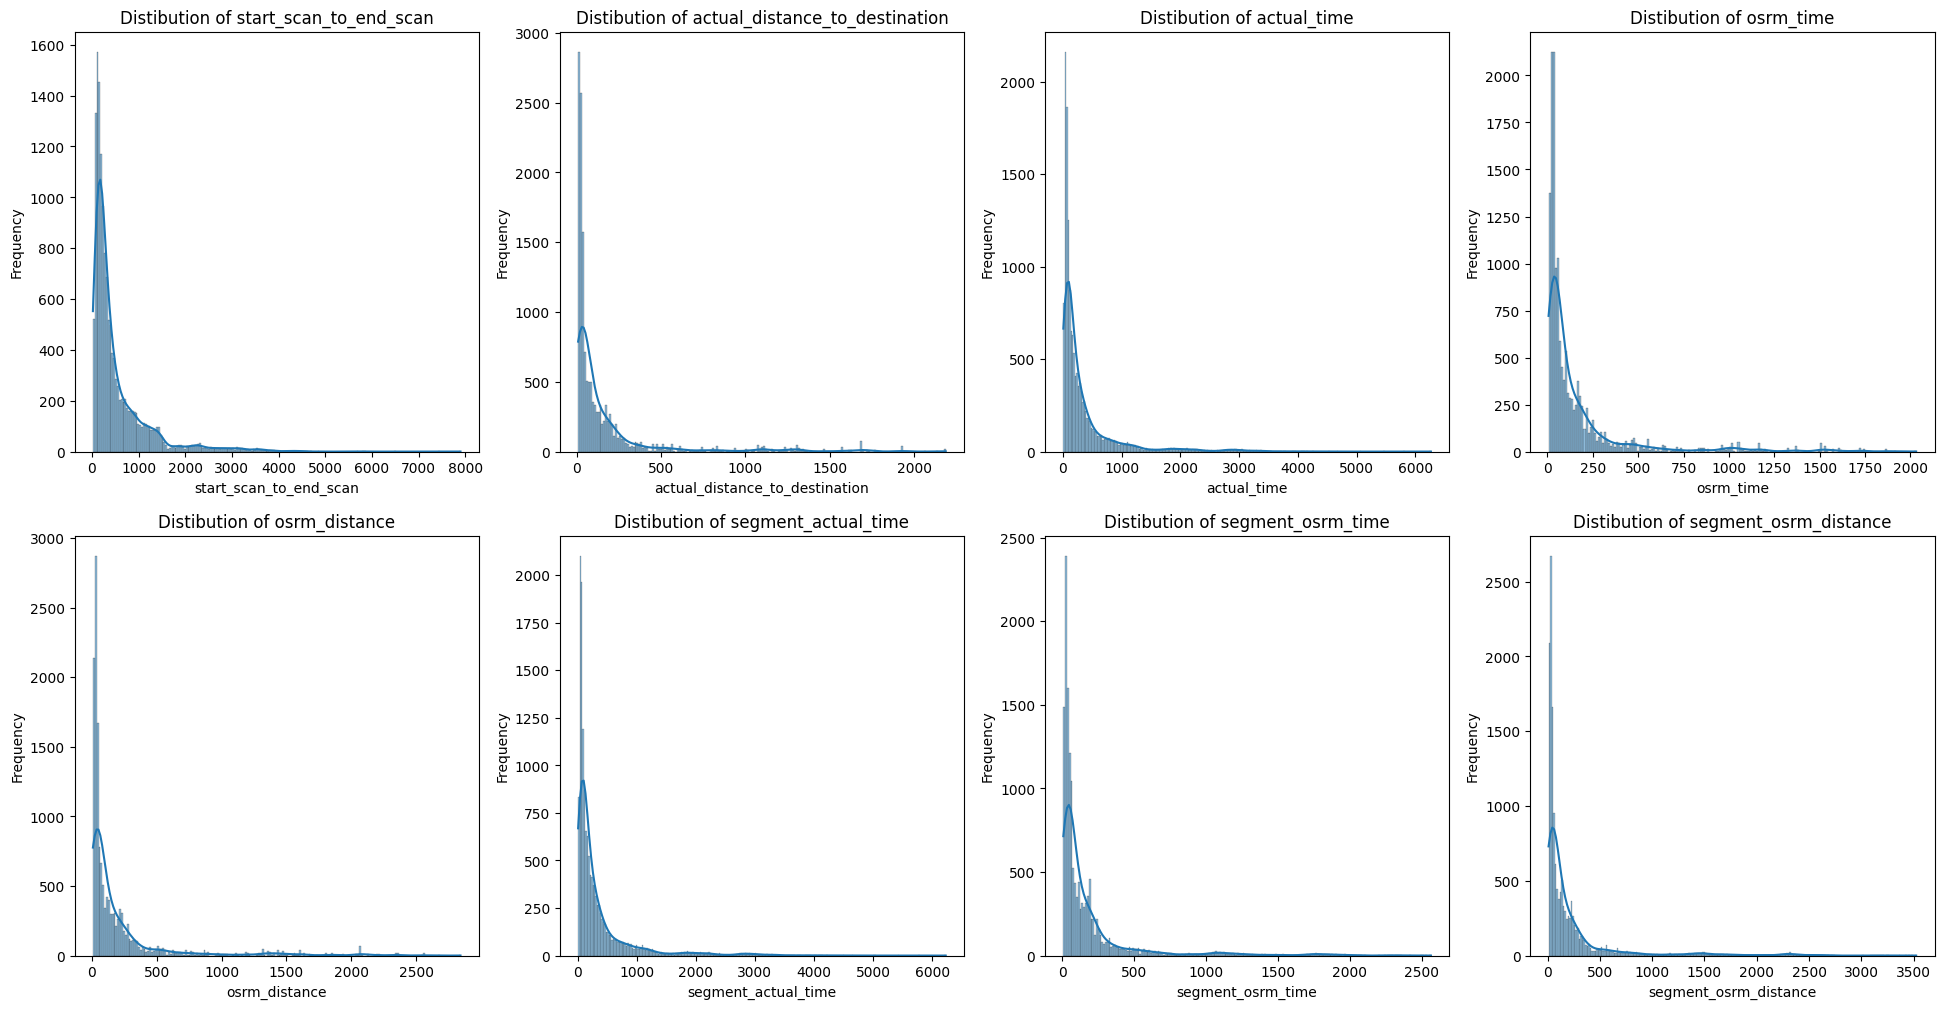

In [40]:
df_num = trip_df[['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 
                'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']]

fig = plt.subplots(figsize=(24, 12))

for idx, col in enumerate(df_num.columns):
    plt.subplot(2, 4, idx+1)
    sns.histplot(x = col, data = df_num, kde = True)
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.show()

In [41]:
df_num.skew()

start_scan_to_end_scan            2.886194
actual_distance_to_destination    3.555541
actual_time                       3.368140
osrm_time                         3.447243
osrm_distance                     3.546835
segment_actual_time               3.364991
segment_osrm_time                 3.595458
segment_osrm_distance             3.707705
dtype: float64

- While the maximum osrm_time is 2000 mins (33.3 hrs), the actual time goes upto 6000 mins (100 hrs) which is almost triple.
- All the numeric features are highly right skewed.

### Number of Trips by Source & Destination State:

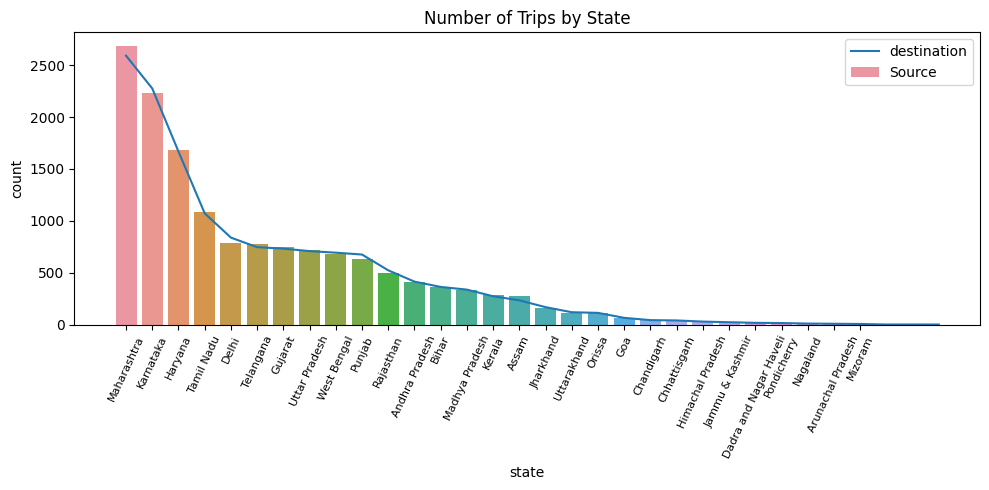

In [42]:
plt.figure(figsize=(10,5))

source=trip_df.source_state.value_counts().reset_index().rename(columns={'index': 'state',
                                                                  'source_state':'count'})

destination=trip_df.destination_state.value_counts().reset_index().rename(columns={'index':'state',
    'destination_state': 'count'})

sns.barplot(data=source, x='state', y='count', label='Source')
sns.lineplot(data=destination, x='state', y='count', label='destination')
plt.title('Number of Trips by State')
plt.legend()
plt.xticks(rotation=65, fontsize=8)
plt.tight_layout()
plt.show()

- Maharashtra, Karnataka, Haryana, Tamil Nadu, Delhi have highest number of deliveries.
- Smaller states like Arunachal Pradesh, Nagaland, Himachal, Pondicherry, J&K, Goa etc have the lowest volumes as expected.

### Busiest Corridors:

In [43]:
trip_df.groupby(['source_name','destination_name'])['trip_uuid'].count().sort_values(ascending=False).reset_index().head(10)

source_name                   destination_name  \
0     Chandigarh_Mehmdpur_H (Punjab)     Chandigarh_Mehmdpur_H (Punjab)   
1   Bangalore_Nelmngla_H (Karnataka)  Bengaluru_KGAirprt_HB (Karnataka)   
2        Muzaffrpur_Bbganj_I (Bihar)        Muzaffrpur_Bbganj_I (Bihar)   
3  Bengaluru_Bomsndra_HB (Karnataka)  Bengaluru_KGAirprt_HB (Karnataka)   
4  Bhiwandi_Mankoli_HB (Maharashtra)  Bhiwandi_Mankoli_HB (Maharashtra)   
5  Bengaluru_KGAirprt_HB (Karnataka)   Bangalore_Nelmngla_H (Karnataka)   
6       Ahmedabad_East_H_1 (Gujarat)       Ahmedabad_East_H_1 (Gujarat)   
7  Bhiwandi_Mankoli_HB (Maharashtra)           Mumbai Hub (Maharashtra)   
8   Mumbai_Chndivli_PC (Maharashtra)  Bhiwandi_Mankoli_HB (Maharashtra)   
9   Bangalore_Nelmngla_H (Karnataka)  Bengaluru_Bomsndra_HB (Karnataka)   

   trip_uuid  
0        175  
1        151  
2        130  
3        121  
4        113  
5        108  
6        107  
7        105  
8         99  
9         97

### Flow between top states:

In [45]:
state_colors = {
    "Karnataka": "#FF7F50",
    "Maharashtra": "#FF6347",
    "Tamil Nadu": "#800080",
    "Gujarat": "#FFA500",
    "Delhi": "#E6E6FA",
    "Haryana": "#808080",
    "Telangana": "#00FFFF",
    "Rajasthan": "#0000FF",
    "Uttar Pradesh": "#FFFF00",
    "Assam": "#FFD700",
    "Madhya Pradesh": "#00FF00",
    "West Bengal": "#FFC0CB",
    "Andhra Pradesh": "#FF00FF",
    "Punjab": "#FF0000",
    "Kerala": "#00FF00",
    "Bihar": "#800000",
}

flow = trip_df[(trip_df["source_state"].isin(state_colors.keys())) & (trip_df["destination_state"].isin(state_colors.keys()))]
flow = flow[['source_state','destination_state']]

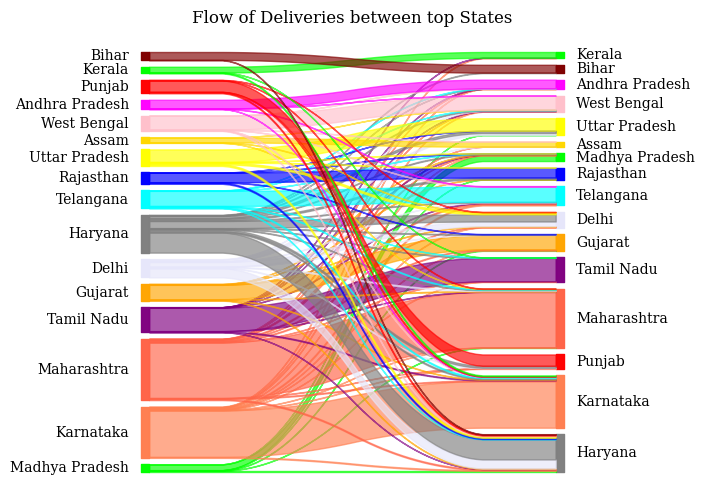

In [46]:
from pySankey.sankey import sankey

sankey(flow.source_state, flow.destination_state, aspect=20, colorDict=state_colors, fontsize=10)
plt.title('Flow of Deliveries between top States')
plt.show()

- We can see that the maximum trips are intra-state. 
- Karnataka and Maharashtra have the highest volumes of trips.

### Time and Distance by route_type:

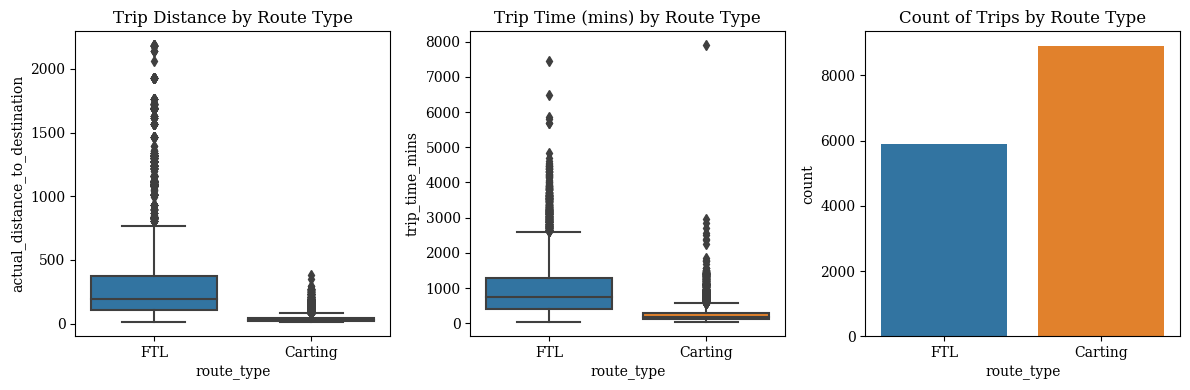

In [47]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

sns.boxplot(data=trip_df, x='route_type', y='actual_distance_to_destination', ax=ax[0])
sns.boxplot(data=trip_df, x='route_type', y='trip_time_mins', ax=ax[1])
sns.countplot(x=trip_df['route_type'], ax=ax[2])

ax[0].set_title('Trip Distance by Route Type')
ax[1].set_title('Trip Time (mins) by Route Type')
ax[2].set_title('Count of Trips by Route Type')

plt.tight_layout()
plt.show()

- Carting route type is used for short-distance (0-100km) and short duration (<500 mins) trips, while FTLs are used for long-distance (>100km) and long-duration (>300 mins) trips.
- FTL trips are almost 60% of carting trips in count.

### Actual Delivery time by month/weekday/day/hour:

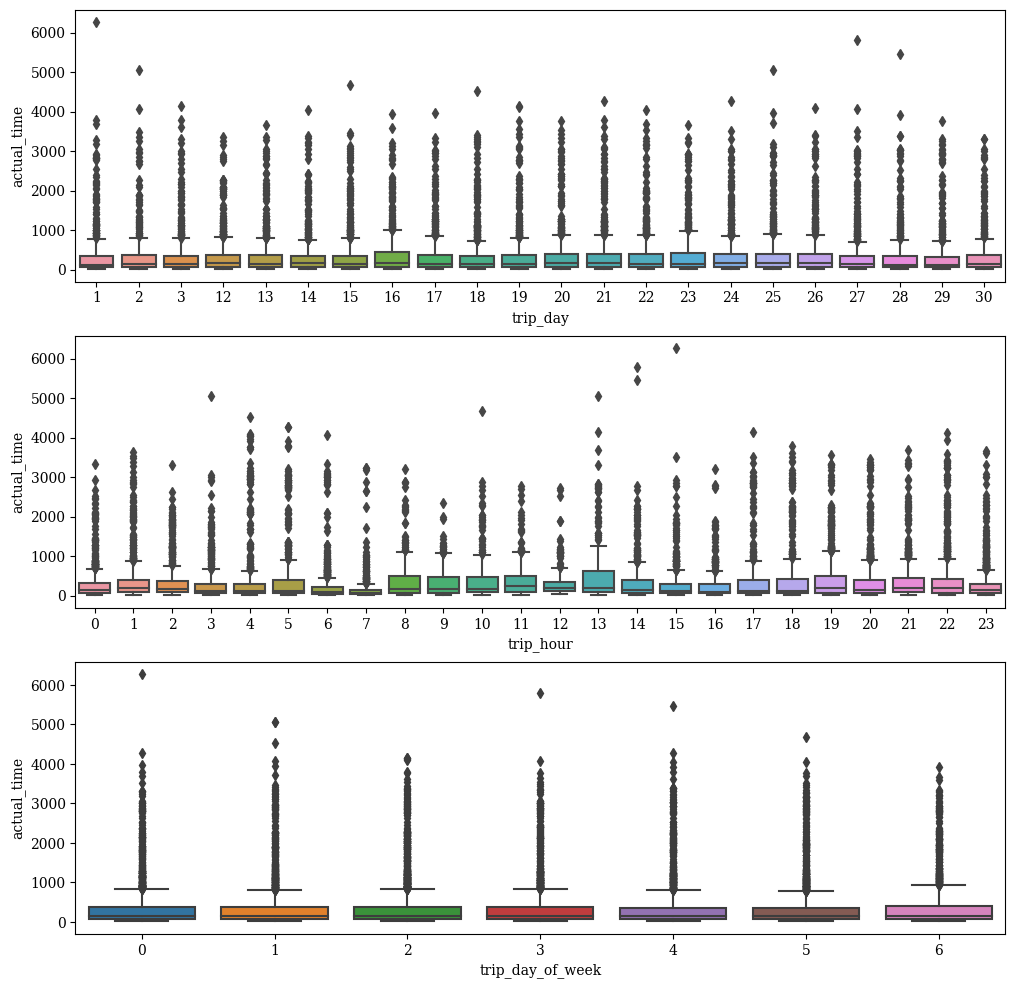

In [48]:
fig, ax = plt.subplots(3,1,figsize=(12,12))

sns.boxplot(data=trip_df, x='trip_day', y='actual_time', ax=ax[0])
sns.boxplot(data=trip_df, x='trip_hour', y='actual_time', ax=ax[1])
sns.boxplot(data=trip_df, x='trip_day_of_week', y='actual_time', ax=ax[2])

plt.show()

- (9:00am to 12:00pm) and (5:00pm to 10:00pm) seem to be the busiest hours of the day when the average delivery time is higher.
- The day/weekday of delivery has no significant impact on the delivery time.

### Number of Trips by hour and Day of week:

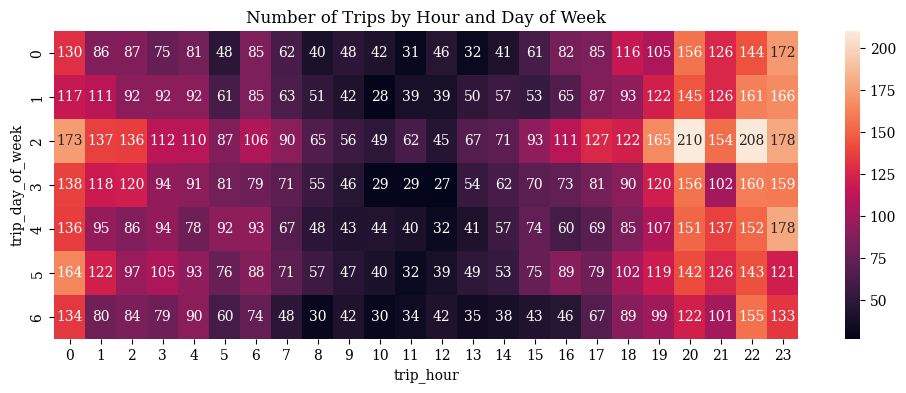

In [49]:
data = pd.pivot_table(data=trip_df, 
                      index='trip_day_of_week', 
                      columns='trip_hour', 
                      values='trip_uuid', 
                      aggfunc='count')

plt.figure(figsize=(12,4))
sns.heatmap(data, annot=True, fmt='d')
plt.title('Number of Trips by Hour and Day of Week')

plt.show()

- Wednesday(trip_day_of_week = 2) is the busiest day of the week with maximum number of trips.
- (8pm-1am) is the busiest time of the day having maximum number of trips (probably because the delivery time is least during these hours - less traffic on the roads).

### Average trip time by source and destination state:

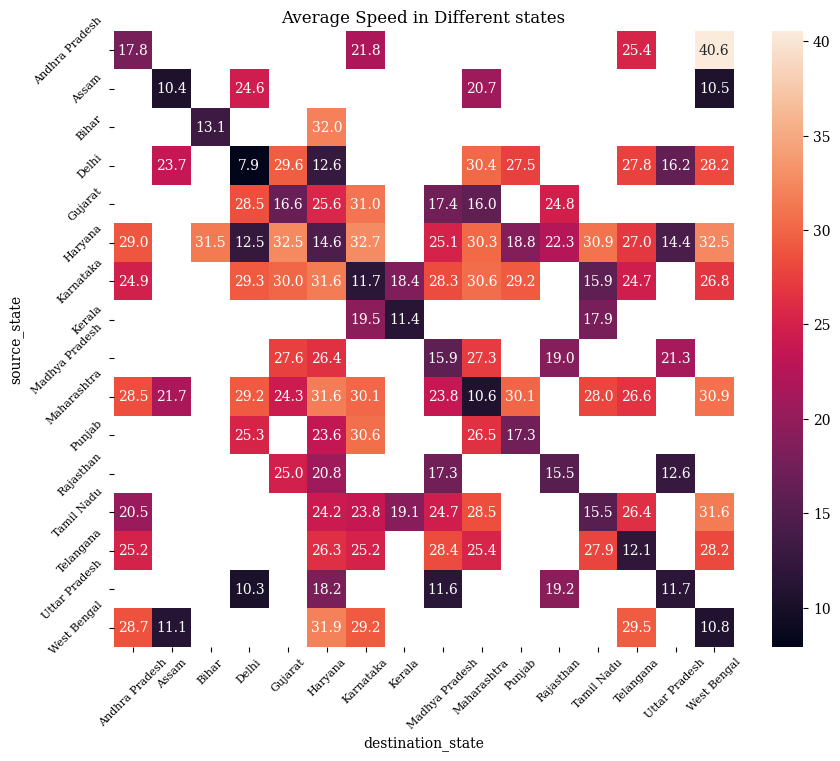

In [50]:
flow = trip_df[(trip_df["source_state"].isin(state_colors.keys())) & (trip_df["destination_state"].isin(state_colors.keys()))][['source_state','destination_state','trip_time_mins','actual_distance_to_destination']]
flow['speed'] = flow['actual_distance_to_destination']/(flow['trip_time_mins']/60)
data = pd.pivot_table(data=flow, index='source_state', columns='destination_state', values='speed', aggfunc='mean')
plt.figure(figsize=(10,8))
sns.heatmap(data, annot=True, fmt='.1f')
plt.title('Average Speed in Different states')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45, fontsize=8)

plt.show()

- It can be observed that average speed in inter-state deliveries is much higher than in intra-state deliveries.
- Delhi has the lowest intra-state delivery speed while Punjab has the highest.

# Hypothesis Testing & Visual Analysis

## Trip_time(mins) & start_scan_to_end_scan:

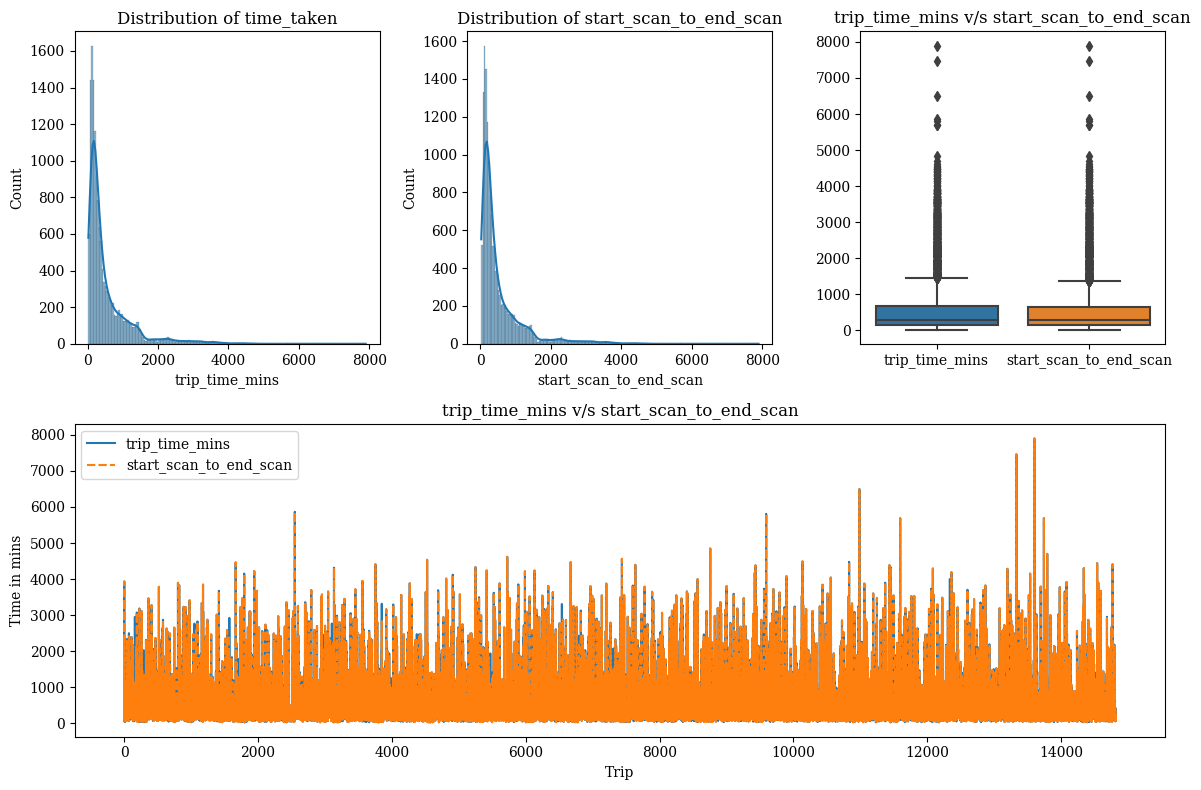

In [51]:
# Distribution of trip_time_mins & start_scan_to_end_scan

fig = plt.figure(figsize=(12, 8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2, 3), (0, 0), colspan=1)
ax[1] = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax[2] = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax[3] = plt.subplot2grid((2, 3), (1, 0), colspan=3)

sns.histplot(data=trip_df['trip_time_mins'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['start_scan_to_end_scan'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['trip_time_mins', 'start_scan_to_end_scan']], ax=ax[2])
sns.lineplot(data = trip_df[['trip_time_mins','start_scan_to_end_scan']], ax=ax[3])

ax[0].set_title('Distribution of time_taken')
ax[1].set_title('Distribution of start_scan_to_end_scan')
ax[2].set_title('trip_time_mins v/s start_scan_to_end_scan')
ax[3].set_title('trip_time_mins v/s start_scan_to_end_scan')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time in mins')

plt.tight_layout()
plt.show()

- The histograms show that both trip_time_mins & start_scan_to_end_scan is right skewed and not nrmally distributed.
- We can clearly see from the box plot and the lineplot that the trip_time_mins is higher than the start_scan_to_end_scan.

In [52]:
print('Mean of trip_time_mins:',trip_df.trip_time_mins.mean())
print('Mean of start_scan_to_end_scan', trip_df.start_scan_to_end_scan.mean())

Mean of trip_time_mins: 547.6421385135135
Mean of start_scan_to_end_scan 530.9272297297297


We can observe that:

- The average trip_time_mins is higher than the average start_scan_to_end_scan.

Independent t-test assumes data to be normally distributed data. Since the sample size is large enough, by virtue of central limit theorem, we can assume normal distribution. So, we will proceed with Independent T-Test with 5% significance level.

In [53]:
from scipy.stats import ttest_ind

sample1 = trip_df['trip_time_mins']
sample2 = trip_df['start_scan_to_end_scan']

# Null Hypothesis: trip_time_mins is not higher than start_scan_to_end_scan
# Alternative Hypothesis: trip_time_mins is higher than start_scan_to_end_scan

t_stat, p_value = ttest_ind(sample1, sample2, alternative = "greater")
print("t_statistics:", t_stat)
print("p_value:", p_value)

alpha = 0.05
if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \ntrip_time_mins is not higher than start_scan_to_end_scan")
else:
  print("Result: \nReject null hypothesis. \ntrip_time_mins is higher than start_scan_to_end_scan")

t_statistics: 2.166451570275027
p_value: 0.01514232534123701
Result: 
Reject null hypothesis. 
trip_time_mins is higher than start_scan_to_end_scan


**Since pvalue is less than 0.05, we will reject the Null hypothesis. We can say that trip_time_mins is higher than start_scan_to_end_scan.**

## Actual Time & OSRM Time:

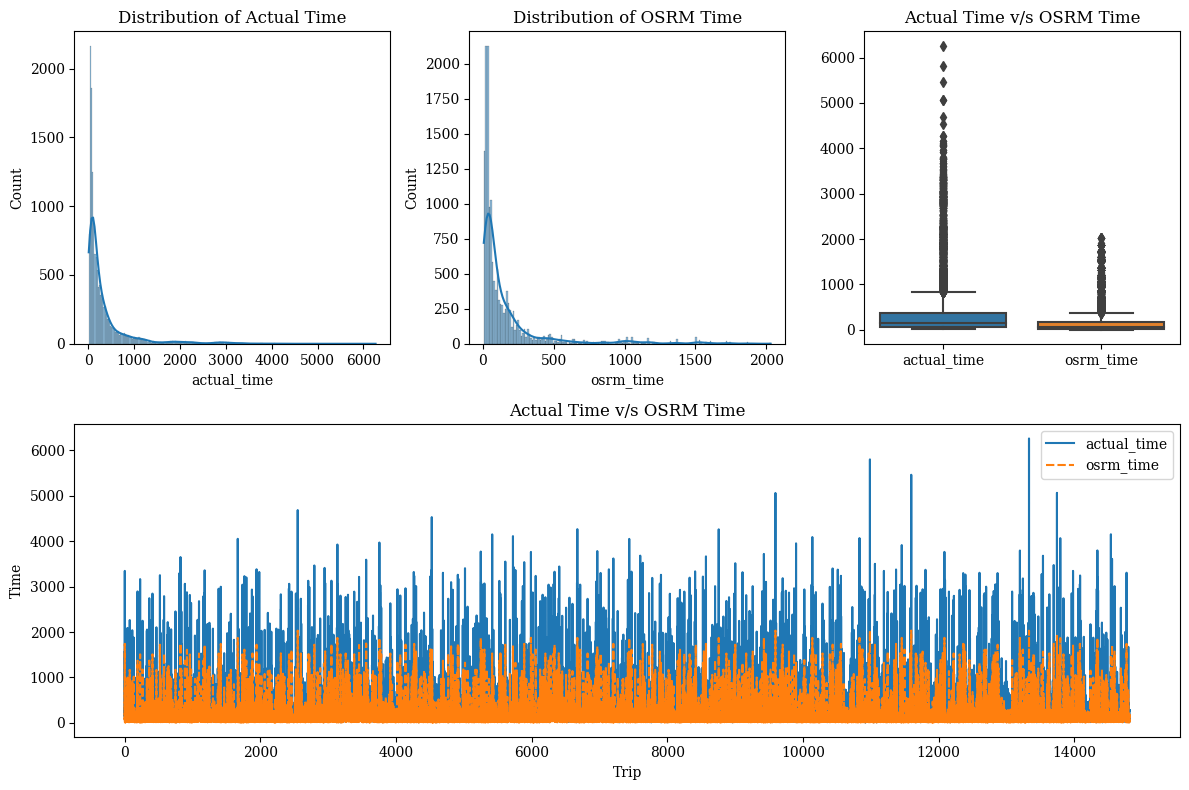

In [54]:
# Distribution of actual time and osrm time

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data = trip_df['actual_time'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[1])
sns.boxplot(data = trip_df[['actual_time','osrm_time']], ax=ax[2])
sns.lineplot(data = trip_df[['actual_time','osrm_time']], ax=ax[3])

ax[0].set_title('Distribution of Actual Time')
ax[1].set_title('Distribution of OSRM Time')
ax[2].set_title('Actual Time v/s OSRM Time')
ax[3].set_title('Actual Time v/s OSRM Time')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time')

plt.tight_layout()
plt.show()

- The histograms show that both actual_time and osrm_time is right skewed and not nrmally distributed.
- We can clearly see from the box plot and the lineplot that the actual time is much higher than the OSRM time.

In [55]:
print('Mean of Actual Time:',trip_df.actual_time.mean())
print('Mean of OSRM Time', trip_df.osrm_time.mean())

Mean of Actual Time: 357.2829054054054
Mean of OSRM Time 161.47885135135135


We can observe that:

- The average Actual time is higher than the average OSRM time. 

So, to confirm the above statement, we can do ttest_ind by taking significant level 5%.

In [56]:
from scipy.stats import ttest_ind

sample1 = trip_df['actual_time']
sample2 = trip_df['osrm_time']

# Null Hypothesis: actual_time is not higher than osrm_time
# Alternative Hypothesis: actual_time is higher than osrm_time

t_stat, p_value = ttest_ind(sample1, sample2, alternative = "greater")
print("t_statistics:", t_stat)
print("p_value:", p_value)

alpha = 0.05
if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \n Actual time is not higher than osrm time")
else:
  print("Result: \nReject null hypothesis. \nActual time is higher than osrm time")

t_statistics: 38.18753943384186
p_value: 0.0
Result: 
Reject null hypothesis. 
Actual time is higher than osrm time


**Since pvalue is less than 0.05, we will reject the Null hypothesis. We can say that Actual time is higher than OSRM time.**

## Actual Time & Segment Actual Time:

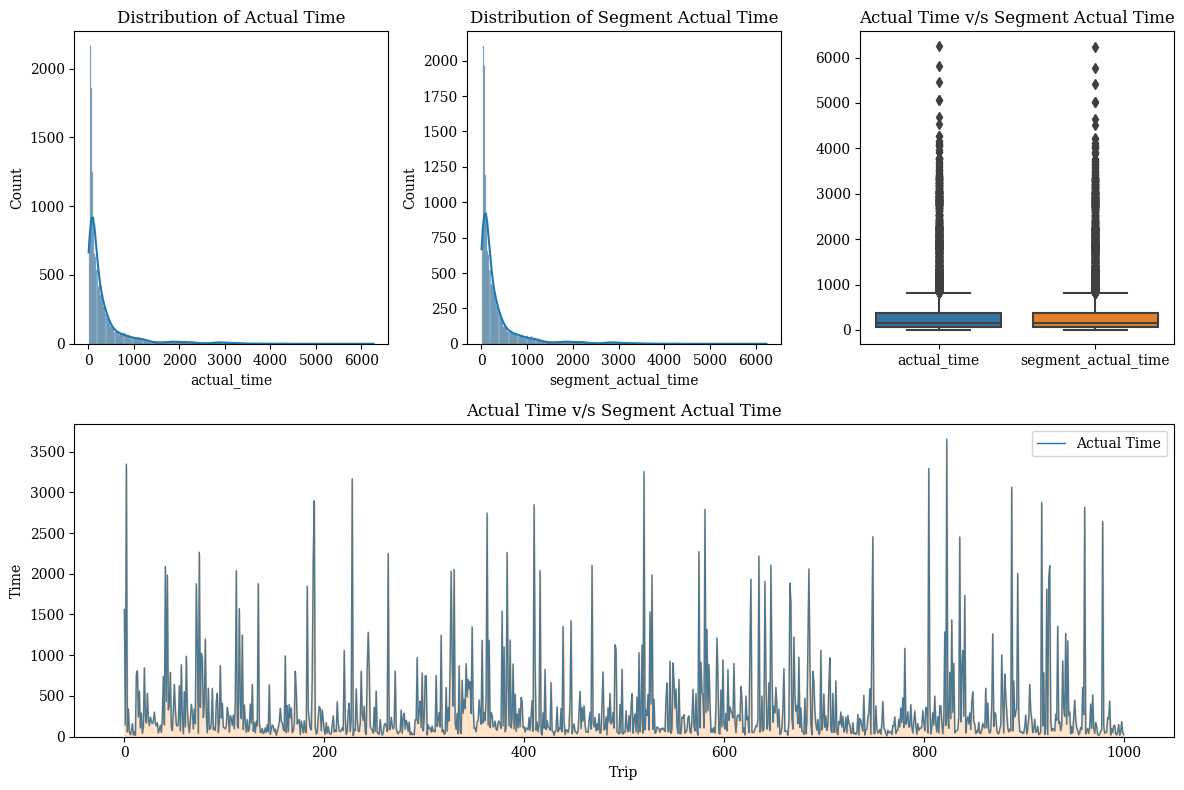

In [57]:
# Distribution of actual time and segment actual time

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data = trip_df['actual_time'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[1])
sns.boxplot(data = trip_df[['actual_time','segment_actual_time']], ax=ax[2])
sns.lineplot(data=trip_df['actual_time'].loc[:1000], label='Actual Time', ax=ax[3], lw=1)
trip_df['segment_actual_time'].loc[:1000].plot(kind='area', ax=ax[3], alpha=0.2, label='Segment Actual Time')

ax[0].set_title('Distribution of Actual Time')
ax[1].set_title('Distribution of Segment Actual Time')
ax[2].set_title('Actual Time v/s Segment Actual Time')
ax[3].set_title('Actual Time v/s Segment Actual Time')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time')

plt.tight_layout()
plt.show()

- Both actual time and segment actual time are right-skewed and not normally distributed.
- We can see from the boxplot and the lineplot that the actual time and segment actual time do not differ much.

In [58]:
print('Mean of Actual Time:',trip_df.actual_time.mean())
print('Mean of Segment Actual Time', trip_df.segment_actual_time.mean())

Mean of Actual Time: 357.2829054054054
Mean of Segment Actual Time 354.0289189189189


We can observe that:

- There is not much difference between the average actual time and average segement actual time.

Independent t-test assumes data to be normally distributed data. 
Since the sample size is large enough, by virtue of central limit theorem, we can assume normal distribution. So, we will proceed with Independent T-Test with 5% significance level.

In [59]:
from scipy.stats import ttest_ind

sample1 = trip_df['actual_time']
sample2 = trip_df['segment_actual_time']

# Null Hypothesis: There is no difference between actual_time and segment_actual_time
# Alternative Hypothesis: There is a difference between actual_time and segment_actual_time

t_stat, p_value = ttest_ind(sample1, sample2, alternative='two-sided')
print('Test Statistic:', t_stat)
print('P value:', p_value)

alpha = 0.05
if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nThere is no difference between actual time and segment actual time")
else:
  print("Result: \nReject null hypothesis. \nThere is a difference between actual time and segment actual time")

Test Statistic: 0.5007261390408064
P value: 0.6165675968933484
Result: 
Fail to reject null hypothesis. 
There is no difference between actual time and segment actual time


**Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that There is difference between actual time and segment actual time.**

## OSRM Distance & Segment OSRM Distance:

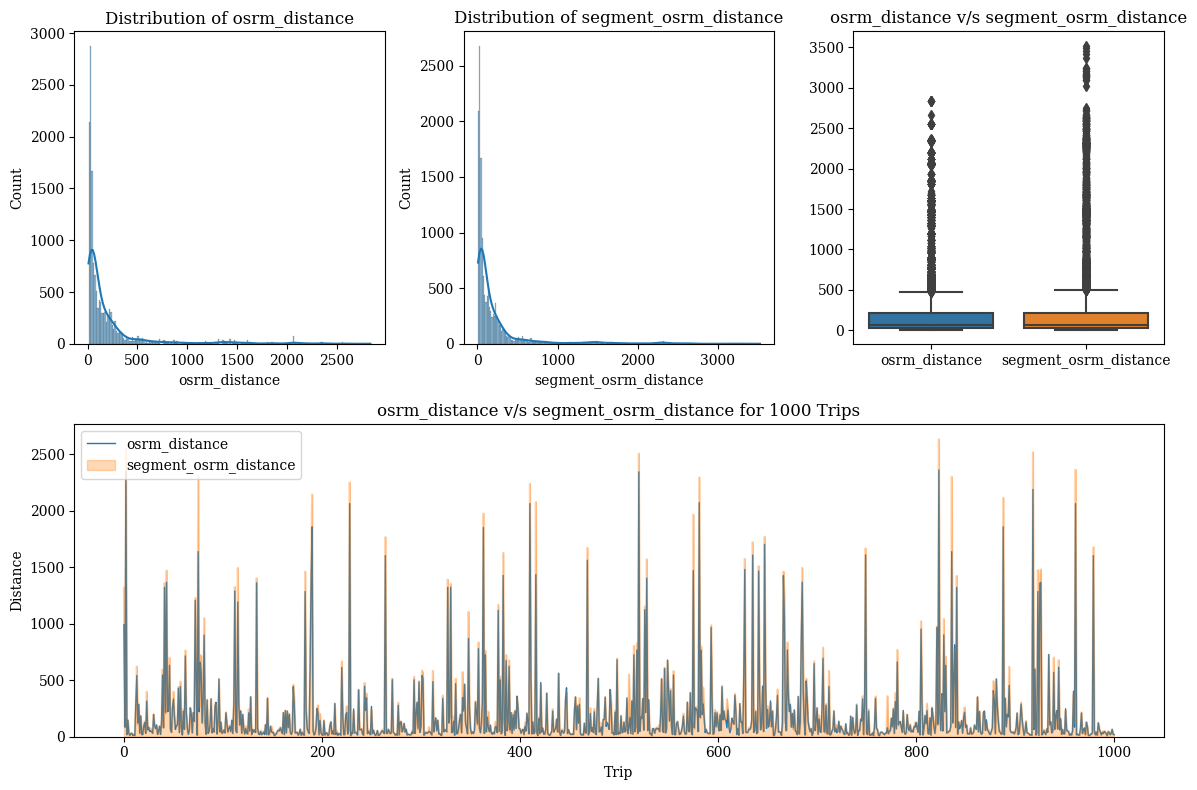

In [60]:
# Distribution of osrm distance and segment osrm distance

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['osrm_distance','segment_osrm_distance']], ax=ax[2])
sns.lineplot(data=trip_df['osrm_distance'].loc[:1000], label='osrm_distance',
             ax=ax[3], lw=1)
trip_df['segment_osrm_distance'].loc[:1000].plot(kind='area', ax=ax[3],
                                              alpha=0.3,
                                              label='segment_osrm_distance')

ax[0].set_title('Distribution of osrm_distance')
ax[1].set_title('Distribution of segment_osrm_distance')
ax[2].set_title('osrm_distance v/s segment_osrm_distance')
ax[3].set_title('osrm_distance v/s segment_osrm_distance for 1000 Trips')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Distance')
ax[3].legend()

plt.tight_layout()
plt.show()

- Distributions for both features are right-skewed.
- The box plot shows a small difference between the mean values of osrm distance and segment osrm distance.
- In the sample data of 1000 trips (lineplot), we see that osrm distance is lesser than segment osrm distance in most cases.

In [61]:
print('Average osrm_distance:',trip_df.osrm_distance.mean())
print('Average segment_osrm_distance', trip_df.segment_osrm_distance.mean())

Average osrm_distance: 204.4722385472973
Average segment_osrm_distance 223.34120322297298


We can observe that:

- The average Average osrm_distance is lesser than the Average segment_osrm_distance.

Independent t-test assumes data to be normally distributed data. Since the sample size is large enough, by virtue of central limit theorem, we can assume normal distribution. So, we will proceed with Independent T-Test with 5% significance level.

In [62]:
from scipy.stats import ttest_ind

sample1 = trip_df['osrm_distance']
sample2 = trip_df['segment_osrm_distance']

# Null Hypothesis: osrm_distance is not lesser than segment_osrm_distance
# Alternative Hypothesis: osrm_distance is lesser than segment_osrm_distance

t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, alternative='less')
print('Test Statistic:', t_stat)
print('P value:', p_value)

alpha = 0.05
if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nosrm_distance is not lesser than segment_osrm_distance")
else:
  print("Result: \nReject null hypothesis. \nosrm_distance is lesser than segment_osrm_distance")

Test Statistic: -4.115625507230611
P value: 1.9359510698997935e-05
Result: 
Reject null hypothesis. 
osrm_distance is lesser than segment_osrm_distance


**Since pvalue is less than 0.05, we will reject the Null hypothesis. We can say that, osrm_distance is lesser than segment_osrm_distance.**

## OSRM Time and Segment OSRM Time:

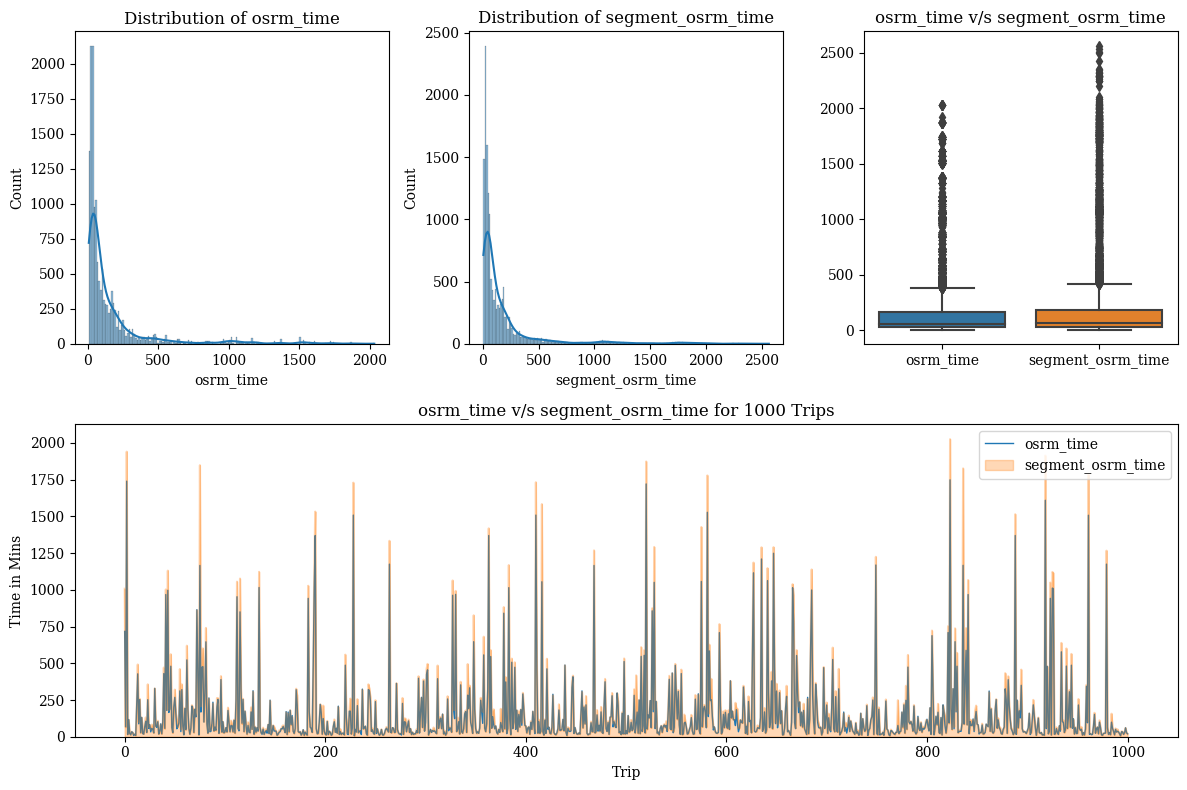

In [63]:
# Distribution of osrm distance and segment osrm distance

fig = plt.figure(figsize=(12,8))

ax = [None for i in range(4)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan=1)
ax[1] = plt.subplot2grid((2,3), (0,1), colspan=1)
ax[2] = plt.subplot2grid((2,3), (0,2), colspan=1)
ax[3] = plt.subplot2grid((2,3), (1,0), colspan=3)

sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[0])
sns.histplot(data=trip_df['segment_osrm_time'], kde=True, ax=ax[1])
sns.boxplot(data=trip_df[['osrm_time','segment_osrm_time']], ax=ax[2])
sns.lineplot(data=trip_df['osrm_time'].loc[:1000], label='osrm_time',
             ax=ax[3], lw=1)
trip_df['segment_osrm_time'].loc[:1000].plot(kind='area', ax=ax[3],
                                              alpha=0.3,
                                              label='segment_osrm_time')

ax[0].set_title('Distribution of osrm_time')
ax[1].set_title('Distribution of segment_osrm_time')
ax[2].set_title('osrm_time v/s segment_osrm_time')
ax[3].set_title('osrm_time v/s segment_osrm_time for 1000 Trips')
ax[3].set_xlabel('Trip')
ax[3].set_ylabel('Time in Mins')
ax[3].legend()

plt.tight_layout()
plt.show()

- The boxplot and the lineplot of 1000 trips shows that osrm_time is lesser than segment_osrm_time.
- The distributions are right skewed.

In [64]:
print('Average OSRM Time:',trip_df.osrm_time.mean())
print('Average Segment OSRM Time', trip_df.segment_osrm_time.mean())

Average OSRM Time: 161.47885135135135
Average Segment OSRM Time 181.05628378378378


We can observe that:

- The average Average osrm time is lesser than the Average segment osrm time.

Independent t-test assumes data to be normally distributed data. Since the sample size is large enough, by virtue of central limit theorem, we can assume normal distribution. So, we will proceed with Independent T-Test with 5% significance level.

In [65]:
from scipy.stats import ttest_ind

sample1 = trip_df['osrm_time']
sample2 = trip_df['segment_osrm_time']

t_stat, p_value = ttest_ind(sample1, sample2, alternative='less')

print('Test Statistic:', t_stat)
print('P value:', p_value)

alpha = 0.05
if p_value>alpha:
  print("Result: \nFail to reject null hypothesis. \nosrm_time is not lesser than segment_osrm_time")
else:
  print("Result: \nReject null hypothesis. \nosrm_time is lesser than segment_osrm_time")

Test Statistic: -5.730310536817779
P value: 5.060941260851265e-09
Result: 
Reject null hypothesis. 
osrm_time is lesser than segment_osrm_time


**Since pvalue is less than 0.05, we will reject the Null hypothesis. We can say that, osrm_time is lesser than segment_osrm_time.**

## Outlier Treatment:

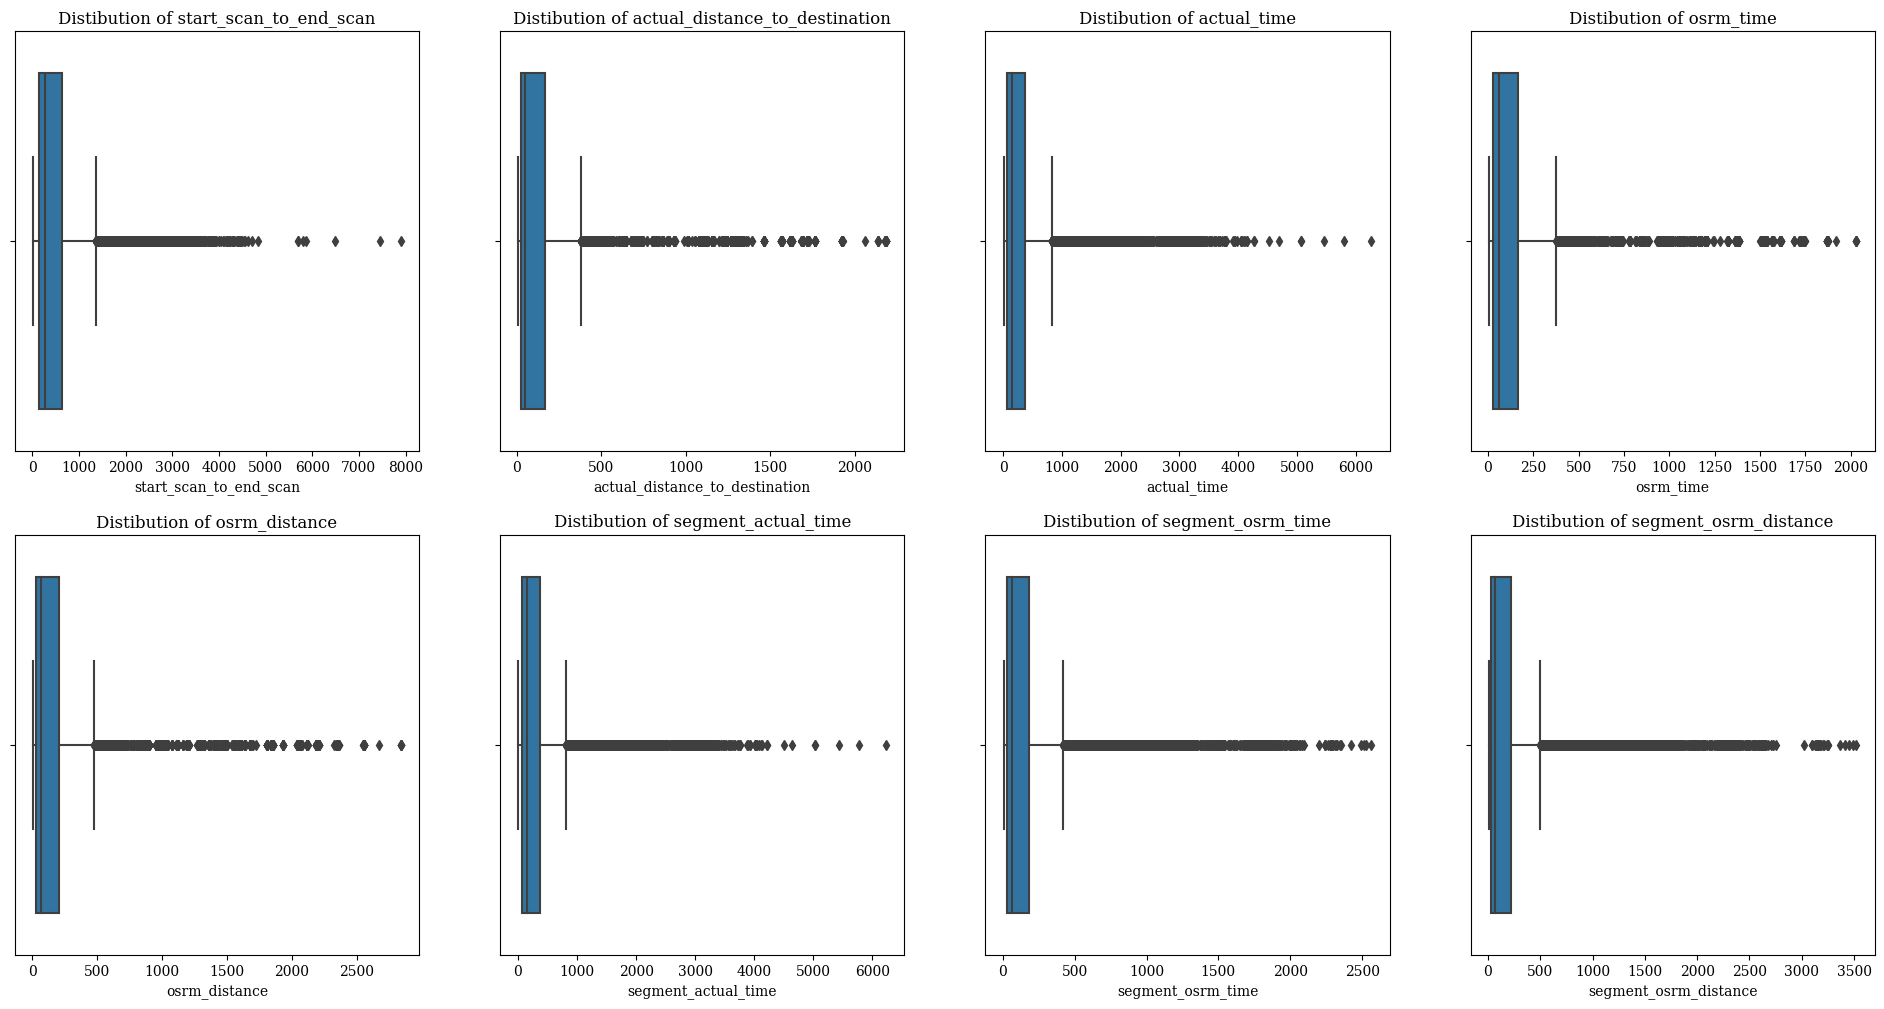

In [66]:
df_num = trip_df[['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 
                'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']]

fig = plt.subplots(figsize=(24, 12))

for idx, col in enumerate(df_num.columns):
    plt.subplot(2, 4, idx+1)
    sns.boxplot(x = col, data = df_num)
    plt.title(f"Distibution of {col}")
    plt.xlabel(col)
       
plt.show()

In [67]:
df_num.skew()

start_scan_to_end_scan            2.886194
actual_distance_to_destination    3.555541
actual_time                       3.368140
osrm_time                         3.447243
osrm_distance                     3.546835
segment_actual_time               3.364991
segment_osrm_time                 3.595458
segment_osrm_distance             3.707705
dtype: float64

In [68]:
# getting the first quartile
Q1 = df_num.quantile(0.25)

# getting the third quartile
Q3 = df_num.quantile(0.75)

# calculating the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

start_scan_to_end_scan            489.000000
actual_distance_to_destination    141.919184
actual_time                       303.000000
osrm_time                         139.250000
osrm_distance                     177.857750
segment_actual_time               301.000000
segment_osrm_time                 155.000000
segment_osrm_distance             186.299975
dtype: float64


In [69]:
# Define the condition for outliers
outlier_condition = ~((df_num < Q1-(1.5*IQR)) | (df_num > Q3+(1.5*IQR))).any(axis=1)

# Filter the DataFrame based on the outlier condition
trip_df = trip_df[outlier_condition]

In [70]:
#Checking the number of rows after removing outliers

trip_df.shape

(12744, 29)

## One-hot Encoding for Categorical Features:

In [71]:
trip = trip_df.copy()

one_hot_encoded = pd.get_dummies(trip['route_type'])
trip_encoded = pd.concat([trip, one_hot_encoded], axis=1)
trip_encoded.drop('route_type', axis=1, inplace=True)

trip_encoded.head(5)

trip_uuid  trip_creation_time  \
1  trip-153671042288605164 2018-09-12 00:00:22   
3  trip-153671046011330457 2018-09-12 00:01:00   
4  trip-153671052974046625 2018-09-12 00:02:09   
5  trip-153671055416136166 2018-09-12 00:02:34   
6  trip-153671066201138152 2018-09-12 00:04:22   

                                 route_schedule_uuid source_center  \
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...  IND572101AAA   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...  IND583101AAA   
5  thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...  IND600116AAB   
6  thanos::sroute:a97698cc-846e-41a7-916b-88b1741...  IND600044AAD   

                         source_name destination_center  \
1      Tumkur_Veersagr_I (Karnataka)       IND562101AAA   
3           Mumbai Hub (Maharashtra)       IND401104AAA   
4             Bellary_Dc (Karnataka)       IND583101AAA   
5     Chennai_Porur_DPC (Tamil Nadu)       IND602105AAB   
6  Chennai_Chrompet_DPC (Tamil Nadu)       IND600048AAA   

                        destination_name       od_start_time  \
1      Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22   
3         Mumbai_MiraRd_IP (Maharashtra) 2018-09-12 00:01:00   
4                 Bellary_Dc (Karnataka) 2018-09-12 00:02:09   
5  Chennai_Sriperumbudur_Dc (Tamil Nadu) 2018-09-12 00:02:34   
6       Chennai_Vandalur_Dc (Tamil Nadu) 2018-09-12 00:04:22   

          od_end_time  start_scan_to_end_scan  ...  source_city  trip_year  \
1 2018-09-12 03:01:59                   180.0  ...       Tumkur       2018   
3 2018-09-12 01:41:29                   100.0  ...       Mumbai       2018   
4 2018-09-12 12:00:30                   717.0  ...      Bellary       2018   
5 2018-09-12 03:13:03                   189.0  ...      Chennai       2018   
6 2018-09-12 01:42:22                    98.0  ...      Chennai       2018   

   trip_month  trip_day  trip_hour  trip_day_of_week  trip_time_mins  \
1           9        12          0                 2      181.616667   
3           9        12          0                 2      100.483333   
4           9        12          0                 2      718.350000   
5           9        12          0                 2      190.483333   
6           9        12          0                 2       98.000000   

        trip_time Carting FTL  
1 0 days 03:01:37       1   0  
3 0 days 01:40:29       1   0  
4 0 days 11:58:21       0   1  
5 0 days 03:10:29       1   0  
6 0 days 01:38:00       1   0  

[5 rows x 30 columns]

## Standardization/Normalization of Numerical Features:

Since in our dataset, the numerical columns have different units and dataset is large, we use standardization.

In [72]:
numeric_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 
                'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
for col in numeric_cols:
    trip_encoded[col] = standard_scale.fit_transform(trip_encoded[[col]])
trip_encoded[numeric_cols]

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
1                   -0.552018                        0.004770    -0.223725   
3                   -0.862649                       -0.766652    -0.751424   
4                    1.533093                        0.752089     1.020137   
5                   -0.517072                       -0.664436    -0.738859   
6                   -0.870415                       -0.877862    -0.971298   
...                       ...                             ...          ...   
14812               -0.253036                       -0.207666    -0.600652   
14813               -1.017965                       -0.789535    -0.990144   
14814                0.383758                       -0.470411     0.649492   
14815                0.096424                        0.852289     0.536413   
14816                0.119722                       -0.093089     0.605517   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
1      -0.150799      -0.080739            -0.227340          -0.268281   
3      -0.877869      -0.805810            -0.745909          -0.878940   
4       0.521398       0.602775             1.031139           0.354841   
5      -0.768123      -0.712895            -0.739585          -0.791703   
6      -0.905306      -0.890712            -0.967250          -0.916327   
...          ...            ...                  ...                ...   
14812  -0.233109      -0.209816            -0.600457          -0.305668   
14813  -0.919024      -0.845612            -0.986222          -0.941252   
14814  -0.425165      -0.371154             0.658022           0.018355   
14815   1.371932       0.872259             0.512570           1.675859   
14816  -0.150799      -0.130963             0.613754          -0.243356   

       segment_osrm_distance  
1                  -0.151801  
3                  -0.824714  
4                   0.503217  
5                  -0.739041  
6                  -0.906935  
...                      ...  
14812              -0.354098  
14813              -0.864351  
14814               0.064757  
14815               1.306163  
14816              -0.189580  

[12744 rows x 8 columns]

# Insights:

- trip_time_mins is higher than start_scan_to_end_scan.
- On average, osrm_time is lesser than segment_osrm_time.
- On average, osrm_distance is lesser than segment_osrm_distance.
- On average, There is no difference between actual time and segment actual time.
- On average, Actual time is higher than osrm time. While the maximum osrm_time is 2000 mins (33.3 hrs), the actual time goes upto 6000 mins (100 hrs) which is almost triple.
- (9:00am to 12:00pm) and (5:00pm to 10:00pm) have higher delivery time.
- Wednesday is the busiest day of the week with maximum number of trips.
- (8:00pm to 1:00am) is the busiest time of the day having maximum number of trips- probably because the delivery time is least during these hours - less traffic on the roads.
- Carting route type is used for short-distance (0-100km) and short duration (<500 mins) trips while FTLs are used for long-distance (>100km) and long-duration (>300 mins) trips.
- FTL trips are 60% of carting trips in count.
- It can be observed that average speed in inter-state deliveries is much higher than the avg speed in intra-state deliveries.
- Delhi has the lowest intra-state delivery speed while Punjab has the highest.
- We can see that the maximum trips are intra-state. Karnataka and Maharashtra have the highest volumes of intra_state trips.
- Maharashtra, Karnataka, Haryana, Tamil Nadu, Delhi have highest number of deliveries.
- Smaller states like Arunachal Pradesh, Nagaland, Himachal, Pondicherry, J&K, Goa etc have the lowest volumes as expected.

# Recommendations:

- Since actual time is higher than OSRM time on an average for all trips, the company needs to either improve their forecasting accuracy or identify root cause of delays in deliveries.
- Identify best practices from Maharashtra and Karnataka (states which have the highest volume of deliveries) to increase business in other states.
- To reduce actual_time, dispatch as many deliveries as possible outside of the busy hours.
- Optimise routes along corridors with maximum average speed to shorten delivery time.